In [5]:

# Goal 
# Create an side by side image for both: original, segmentation-applied image

# To do:
# Get list of all images which were not used for ground-truth data set
from os import listdir
from os.path import isfile, join

path_all_images = "C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_RGB_Images"
path_all_masks = "C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_Mask_Labels"
path_saveFolder = "C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\Segmentation Test\\U-Net_Predictions\\10ep16batch"

# Grab the data unmatched
list_all_images = [x[:-4] for x in listdir(path_all_images)]
list_all_masks = [x[:-4] for x in listdir(path_all_masks)]

# Filter out the images used for training the model
list_images = []
for img in list_all_images:
    found = False
    for mask in list_all_masks:
        if img == mask:
            found = True
    if not found:
        list_images.append(img)
list_image_names = list_images
list_images = [f"{join(path_all_images,img)}.jpg" for img in list_images]
# list_all_images
print(f"length of images: {len(list_all_images)}, length of masks: {len(list_all_masks)} \n format: {list_all_masks[0],list_all_images[0]}")
print(f"Length of matched images: {len(list_images)} of format: {list_images[0]}")

length of images: 407, length of masks: 250 
 format: ('tripod_canopy_2020_211013_090540_15ms', 'tripod_canopy_2020_211013_090540_15ms')
Length of matched images: 161 of format: C:\Users\15593\Documents\repos\hyperspectral\TripodAnalysis\SegNet\Training Data\IOP6_RGB_Images\tripod_canopy_2020_211013_131805_15ms.jpg


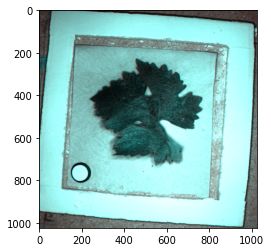

In [21]:
# Alternative image loading (if you have just a single hypercube to use):
from spectral import *
import spectral.io.envi as envi
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import imutils
def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min)/(band_max - band_min))

path_hdr = "G:\Shared drives\Leaf_cabinet_data\Datasets\leaf images\leaf_2020_cabinet_200919_095740_ID983\leaf_2020_200ms_80wl\leaf_2020_200ms_80wl_000000"
path_saveFolder = "C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\Segmentation Test\\U-Net_Predictions\\12epochs_LeafCabinet"
envi_hsi = envi.open(join(path_hdr,'leaf_2020_200ms_80wl_000000.hdr'))
hcube = envi_hsi.load()


# r = hcube[31]#580nm:16
# g = hcube[10]
# b = hcube[9]
r = norm(hcube[:,:,31])#580nm:16
g = norm(hcube[:,:,10])#
b = norm(hcube[:,:,9])
img = np.dstack((r,g,b))
# img = imutils.rotate_bound(img, 90)
plt.imsave('testLeafCabinet.png',img)
plt.imshow(img)
# list_images = [join(path_images,x) for x in listdir(path_images) if x[-3:] == 'png']

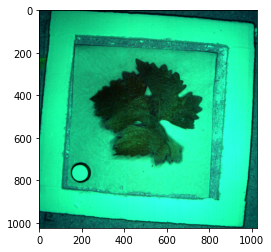

In [83]:
r = norm(hcube[:,:,65])#580nm:16
g = norm(hcube[:,:,8])#
b = norm(hcube[:,:,26])
img = np.dstack((r,g,b))
# img = imutils.rotate_bound(img, 90)
plt.imsave('testLeafCabinet.png',img)
plt.imshow(img)

KeyboardInterrupt: 

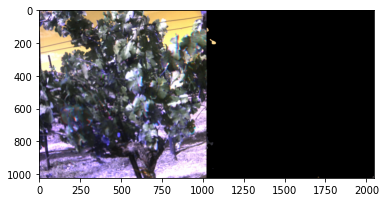

In [7]:
# Run all unused images through the segmentation model:
from tensorflow import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

# list_images = ['C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\Model\\testLeafCabinet.png']
model = keras.models.load_model('segModel_10ep16batch42rs.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
for idx_image, path_toImg in enumerate(list_images):
    test_img_bgr = cv2.imread(path_toImg, cv2.IMREAD_COLOR)
    test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_RGB2BGR)
    test_img = np.expand_dims(test_img_rgb, axis=0)

    prediction = model.predict(test_img)
    prediction_image = prediction.reshape((1024,1024,1)).astype(np.int8)
    img_segmented = cv2.bitwise_and(test_img_rgb,test_img_rgb,mask = prediction_image)
    img_segmented = cv2.cvtColor(img_segmented,cv2.COLOR_BGR2RGB)
    img_sidexside = np.concatenate((test_img_bgr,img_segmented),axis = 1)
    plt.imshow(img_sidexside)
    
    #Save segmented image
    cv2.imwrite(f"{path_saveFolder}\\{list_image_names[idx_image]}.png", img_sidexside) 

    # plt.imshow(prediction_image, cmap='gray')
    # plt.imshow(img_sidexside)
    # break


In [64]:
test_img = cv2.imread(path_toImg)

True

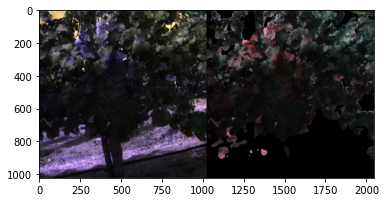

In [74]:
mask_prediction = prediction_image.astype(np.int8)
# mask_prediction1 = cv2.bitwise_not(mask_prediction)
img_segmented = cv2.bitwise_and(test_img,test_img,mask = mask_prediction)
img_segmented = cv2.cvtColor(img_segmented, cv2.COLOR_RGB2BGR)
displayImg = np.concatenate((test_img,img_segmented),axis = 1)
plt.imshow(displayImg)
cv2.imwrite('testhoriz.png',displayImg)

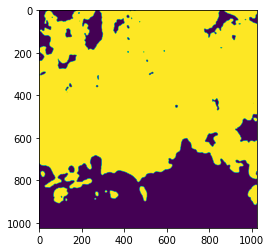

In [42]:
plt.imshow(mask_prediction)